# Attempt at NN

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from path import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [46]:
# Set the random seed for reproducibility
# Note: This is for the homework solution, but it is good practice to comment this out and run multiple experiments to evaluate your model
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [47]:
file_path = Path("../../../../data/cleandata/1hot_merged_post_ICO.csv")
df = pd.read_csv(file_path)

In [48]:
df.head(2)

,Name,Ticker,Duration,pre_Duration,compound,negative,neutral,positive,no_of_posts,Longevity,...,platform_Hyperledger,platform_Litecoin,platform_NEM,platform_NEO,platform_Nxt,platform_Omni,platform_Own Blockchain,platform_Scrypt,platform_Stellar,platform_Waves
0,Ethereum,ETH,0,0,0.460570,0.06116,0.02739,0.90151,100,779,...,0,0,0,0,0,0,0,0,0,0
1,Binance Coin,BNB,20,0,0.563773,0.09667,0.04141,0.86189,100,848,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df.shape

(537, 98)

In [50]:
df.columns

Index(['Name', 'Ticker', 'Duration', 'pre_Duration', 'compound', 'negative',
       'neutral', 'positive', 'no_of_posts', 'Longevity', 'success',
       'Twitter_Compound', 'Twitter_Negative', 'Twitter_Neutral',
       'Twitter_Positive', 'country_Argentina', 'country_Armenia',
       'country_Australia', 'country_Austria', 'country_Azerbaijan',
       'country_Bahamas', 'country_Belarus', 'country_Belgium',
       'country_Belize', 'country_British Indian Ocean Territory',
       'country_Bulgaria', 'country_Cambodia', 'country_Canada',
       'country_Cayman Islands', 'country_China', 'country_Costa Rica',
       'country_Cyprus', 'country_Czech Republic', 'country_Denmark',
       'country_Estonia', 'country_Finland', 'country_France',
       'country_Germany', 'country_Gibraltar', 'country_Hong Kong',
       'country_Ireland', 'country_Isle of Man', 'country_Israel',
       'country_Japan', 'country_Kenya', 'country_Kyrgyzstan', 'country_Laos',
       'country_Latvia', 'country_Lie

In [51]:
X = df.drop(columns = ['Ticker','Name'])

In [52]:
X.columns

Index(['Duration', 'pre_Duration', 'compound', 'negative', 'neutral',
       'positive', 'no_of_posts', 'Longevity', 'success', 'Twitter_Compound',
       'Twitter_Negative', 'Twitter_Neutral', 'Twitter_Positive',
       'country_Argentina', 'country_Armenia', 'country_Australia',
       'country_Austria', 'country_Azerbaijan', 'country_Bahamas',
       'country_Belarus', 'country_Belgium', 'country_Belize',
       'country_British Indian Ocean Territory', 'country_Bulgaria',
       'country_Cambodia', 'country_Canada', 'country_Cayman Islands',
       'country_China', 'country_Costa Rica', 'country_Cyprus',
       'country_Czech Republic', 'country_Denmark', 'country_Estonia',
       'country_Finland', 'country_France', 'country_Germany',
       'country_Gibraltar', 'country_Hong Kong', 'country_Ireland',
       'country_Isle of Man', 'country_Israel', 'country_Japan',
       'country_Kenya', 'country_Kyrgyzstan', 'country_Laos', 'country_Latvia',
       'country_Liechtenstein', 'coun

In [53]:
y = df["success"].values
y.shape

(537,)

In [54]:
X = X.values
X.shape

(537, 96)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [56]:
X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [86]:
# Define the model - shallow neural network
nn = Sequential()

# Hidden layer
nn.add(Dense(units=8, input_dim=96, activation="softmax"))

nn.add(Dense(units=8, activation='relu'))

nn.add(Dense(units=8, activation='relu'))

nn.add(Dense(units=8, activation='relu'))

nn.add(Dense(units=8, activation='relu'))

nn.add(Dense(units=8, activation='relu'))

nn.add(Dense(units=8, activation='relu'))

nn.add(Dense(units=8, activation='relu'))

nn.add(Dense(units=8, activation='relu'))

# Output layer
nn.add(Dense(units=1, activation="sigmoid"))

In [85]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["mse"])

# Fit the model
model = nn.fit(X_train_scaled, y_train, epochs=1000, verbose=0)

ValueError: Error when checking input: expected dense_40_input to have shape (97,) but got array with shape (96,)

In [60]:
# Save model as JSON
nn_json = nn.to_json()

file_path = Path("../NN_model/model_1hot_test_nn.json")

with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Save weights
file_path = Path("../NN_model/model_1hot_test_nn.h5")
nn.save_weights(file_path)

In [61]:
# Load the saved model to make predictions
from tensorflow.keras.models import model_from_json

# load json and create model
file_path = Path("../NN_model/model_1hot_test_nn.json")

with open(file_path, "r") as json_file:
    model_json = json_file.read()
    
loaded_model = model_from_json(model_json)

# load weights into new model
file_path = Path("../NN_model/model_1hot_test_nn.h5")
loaded_model.load_weights("../NN_model/model_1hot_test_nn.h5")

In [62]:
predicted = loaded_model.predict(X_test_scaled)
predicted

array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [2.9802322e-08],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.000000

In [63]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

135/1 - 0s - loss: 0.0635 - mse: 0.0074
Normal Neural Network - Loss: 0.12709634762213404, Accuracy: 0.007407407276332378


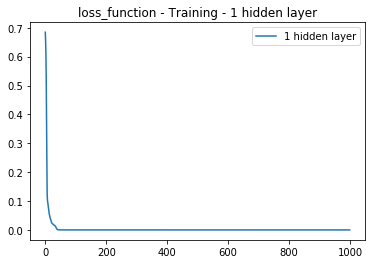

In [64]:
plt.plot(model.history["loss"])
plt.title("loss_function - Training - 1 hidden layer")
plt.legend(["1 hidden layer"])
plt.show()
#This was after I dropped the custom index

In [65]:
min(model.history["loss"])

2.3743322890985155e-09

In [138]:
# file_path = Path("../../../../data/cleandata/success_NN_1H_testICO_df.csv")
# df.to_csv(file_path, index=False)

# Time to predict using the 360 day ICOs

In [102]:
file_path2 = Path("../../../../data/cleandata/1hot_merged_360_ICO.csv")
ico_360 = pd.read_csv(file_path2)

In [103]:
# Load the saved model to make predictions
from tensorflow.keras.models import model_from_json

# load json and create model
file_path = Path("../NN_model/model_1hot_test_nn.json")

with open(file_path, "r") as json_file:
    model_json = json_file.read()
    
loaded_model = model_from_json(model_json)

# load weights into new model
file_path = Path("../NN_model/model_1hot_test_nn.h5")
loaded_model.load_weights("../NN_model/model_1hot_test_nn.h5")

In [104]:
ico_360.columns

Index(['Name', 'Ticker', 'Duration', 'pre_Duration', 'compound', 'negative',
       'neutral', 'positive', 'no_of_posts', 'Longevity', 'success',
       'Twitter_Compound', 'Twitter_Negative', 'Twitter_Neutral',
       'Twitter_Positive', 'country_Argentina', 'country_Armenia',
       'country_Australia', 'country_Austria', 'country_Azerbaijan',
       'country_Bahamas', 'country_Belarus', 'country_Belgium',
       'country_Belize', 'country_British Indian Ocean Territory',
       'country_Bulgaria', 'country_Cambodia', 'country_Canada',
       'country_Cayman Islands', 'country_China', 'country_Costa Rica',
       'country_Cyprus', 'country_Czech Republic', 'country_Denmark',
       'country_Estonia', 'country_Finland', 'country_France',
       'country_Germany', 'country_Gibraltar', 'country_Hong Kong',
       'country_Ireland', 'country_Isle of Man', 'country_Israel',
       'country_Japan', 'country_Kenya', 'country_Kyrgyzstan', 'country_Laos',
       'country_Latvia', 'country_Lie

In [105]:
X = ico_360.drop(columns = ['Ticker','Name'])

In [106]:
X = X.values
X.shape

(36, 96)

In [107]:
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

In [115]:
X_scaled

array([[-0.390723  , -0.32494699,  0.46499344, ...,  0.        ,
        -0.24253563, -0.16903085],
       [-0.18686752,  1.98508475,  0.56353735, ...,  0.        ,
        -0.24253563, -0.16903085],
       [-0.43149409, -0.27942913,  0.90378238, ...,  0.        ,
        -0.24253563, -0.16903085],
       ...,
       [-0.67612067, -0.43874166, -0.74796412, ...,  0.        ,
        -0.24253563, -0.16903085],
       [-0.81202432, -0.14287553,  1.03493778, ...,  0.        ,
        -0.24253563, -0.16903085],
       [ 0.58778329,  0.58541034,  1.13943765, ...,  0.        ,
         4.12310563, -0.16903085]])

In [114]:
predictions = loaded_model.predict(X_scaled[1])

ValueError: Error when checking input: expected dense_30_input to have shape (96,) but got array with shape (1,)

In [109]:
predicted.shape

(135, 1)

In [96]:
file_path = Path("../../../../data/cleandata/test_and_post_ico/ico_360days_df.csv")
ico_360days_df = pd.read_csv(file_path)

In [99]:
ico_360days_df['Success_Index'] = predicted*100

ValueError: Length of values does not match length of index

In [93]:
file_path = Path("../../../../data/cleandata/Final_success_NN_1H_ICO360_df.csv")
ico_360.to_csv(file_path, index=False)